# Interpolate

## Interpolate 1d

In [1]:
from smpl import plot
from smpl import stat
from smpl import data
from smpl import interpolate
import numpy as np

from smpl import interpolate as interp
from uncertainties import unumpy as unp

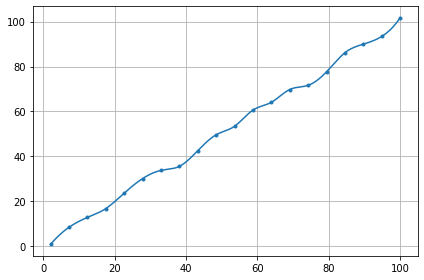

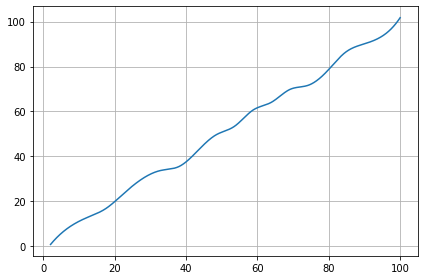

In [2]:
x = np.linspace(2,100,20)
y = stat.noisy(x)
plot.data(x,y,interpolate=True)
plot.show()
plot.data(x,y,interpolate=True,also_data=False)
plot.show()

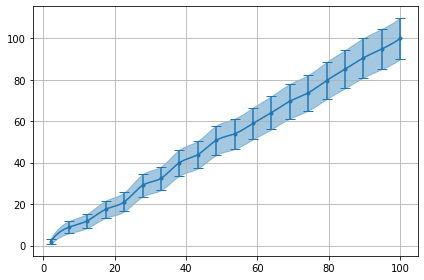

''

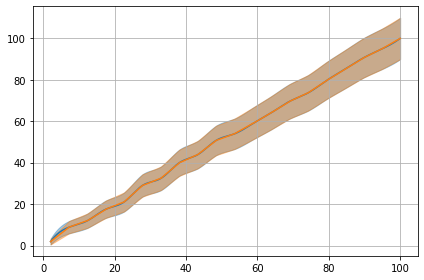

In [3]:
x = np.linspace(2,100,20)
y = stat.poisson_dist(stat.noisy(x))
plot.data(x,y,interpolate=True,sigmas=1,show=True)
plot.data(x,y,interpolate=True,sigmas=1,also_data=False)
plot.data(x,y,interpolate=True,sigmas=1,also_data=False,init=False,interpolator='linear')
""

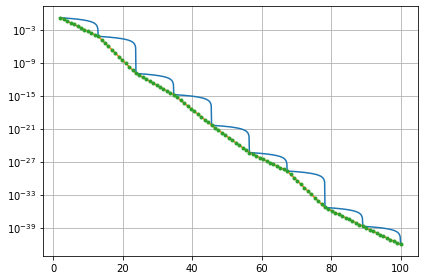

In [4]:
x = np.linspace(2,100,10)
y = np.exp(-stat.noisy(x,std=2))
plot.data(x,y,interpolate=True,also_data=False,interpolator='linear',logy=True)
plot.data(x,y,interpolate=True,also_data=False,interpolator='exp',logy=True,init=False)


f1 = interp.interpolate(x,y,interpolator="exp")

f2 = lambda x_ : np.exp(interp.interpolate(x,unp.log(y),interpolator="linear")(x_))
x2 = np.linspace(2,100,100)
plot.data(x2,f2(x2),logy=True,init=False)
plot.show()

## Interpolate 2d

[  0. -25.   0.  75. 200. -25. -50. -25.  50. 175.   0. -25.   0.  75.
 200.  75.  50.  75. 150. 275. 200. 175. 200. 275. 400.]
[ 1.49435089e-15 -2.50000000e+01 -3.55271368e-14  7.50000000e+01
  2.00000000e+02 -2.50000000e+01 -5.00000000e+01 -2.50000000e+01
  5.00000000e+01  1.75000000e+02  7.10542736e-15 -2.50000000e+01
  3.37507799e-14  7.50000000e+01  2.00000000e+02  7.50000000e+01
  5.00000000e+01  7.50000000e+01  1.50000000e+02  2.75000000e+02
  2.00000000e+02  1.75000000e+02  2.00000000e+02  2.75000000e+02
  4.00000000e+02]


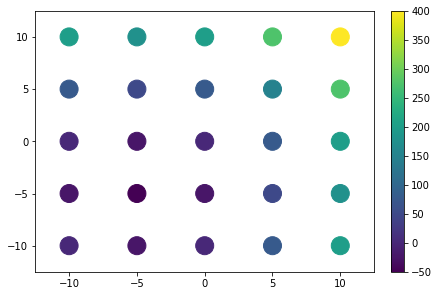

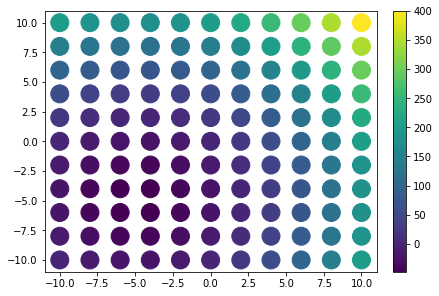

In [5]:
xvalues = np.linspace(-10,10,5)
yvalues = np.linspace(-10,10,5)
xx, yy = data.flatmesh(xvalues, yvalues)
zz=xx**2+yy**2+10*xx+10*yy
print(zz)
plot.plot2d(xx,yy,zz,fill_missing=False,style='scatter',logz=False)
f=interp.interpolate(xx,yy,zz)
print(f(xx,yy))
xvalues = np.linspace(-10,10,11)
yvalues = np.linspace(-10,10,11)
xx, yy = data.flatmesh(xvalues, yvalues)
plot.plot2d(xx,yy,f(xx,yy),fill_missing=False,style='scatter',logz=False)

/usr/local/lib/python3.8/dist-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=3,3 nx,ny=10,8 m=20 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/usr/local/lib/python3.8/dist-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=7,7 m=20 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


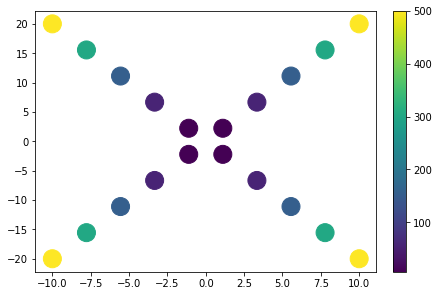

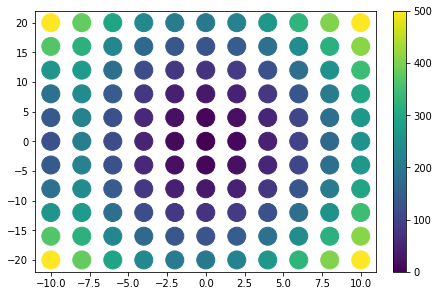

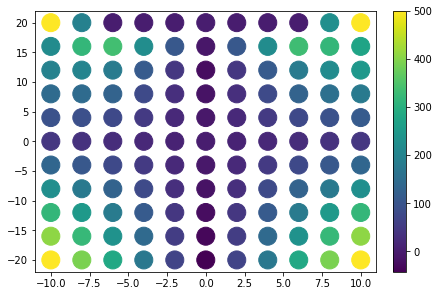

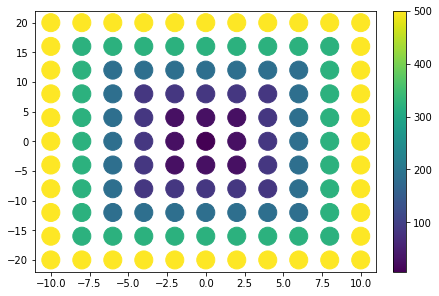

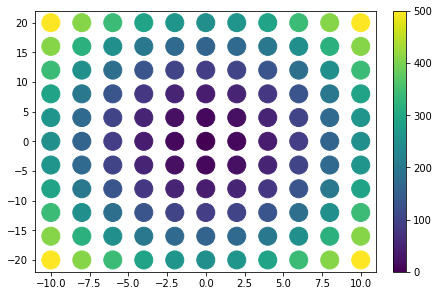

In [6]:
xvalues = np.linspace(-10,10,10)
yvalues = xvalues*2
xx = xvalues
yy = yvalues
xx = np.append(xx,xx)
yy = np.append(yy,-yy)
zz = xx**2+yy**2
f_cub=interp.interpolate(xx,yy,zz)
f_lin=interp.interpolate(xx,yy,zz,interpolator='linear')
f_lind=interp.interpolate(xx,yy,zz,interpolator='linearnd')
f_bi=interp.interpolate(xx,yy,zz,interpolator='bivariatespline')
plot.plot2d(xx,yy,xx**2+yy**2,style='scatter',fill_missing=True,logz=False)

xvalues = np.linspace(-10,10,11)
yvalues = np.linspace(-20,20,11)
xx, yy = data.flatmesh(xvalues, yvalues)
plot.plot2d(xx,yy,f_cub(xx,yy),fill_missing=False,style='scatter',logz=False)
plot.plot2d(xx,yy,f_lin(xx,yy),fill_missing=False,style='scatter',logz=False)
plot.plot2d(xx,yy,f_lind(xx,yy),fill_missing=False,style='scatter',logz=False)
plot.plot2d(xx,yy,f_bi(xx,yy),fill_missing=False,style='scatter',logz=False)